In [1]:
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

In [2]:
### Task 1: Select what features you'll use.
import pandas as pd
import numpy as np

#fpm = "final_project_dataset_modified.pkl" 
fp = "final_project_dataset.pkl"

#fpm_df = pickle.load( open(fpm, "r"))
fp_df = pickle.load( open(fp, "r") )

### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
#fpm_df = pd.DataFrame(fpm_df)
fp_df = pd.DataFrame(fp_df)

#print fp_df.head(5)

### Transpose

Because the rows and columns of dataset are features and samples respectivey, I transposed it to be rows for samples and columns for features. The reason for the transpose is that pandas dataframe provide easy way to extract columns in a dataset using using column's name like *__dataset[variable_name]__* rather than row indice.

In [3]:
fp_df = fp_df.T

#features_list = ['poi','salary'] # You will need to use more features

### Convert NaN to 0

Firstly, convert string type **NaN** value to **np.nan**, so that fillna() function of pandas can work.
Before converting, I inspected how many **NaN** values are in each features. I devided those with total length of data to see the proportion inherent in it.

In [4]:
fp_df.head(5)['bonus']

ALLEN PHILLIP K       4175000
BADUM JAMES P             NaN
BANNANTINE JAMES M        NaN
BAXTER JOHN C         1200000
BAY FRANKLIN R         400000
Name: bonus, dtype: object

Features having **NaN** more than 0.5 might no be useful? I can know about which value can be a threshold with the rate of person of interest.

#### NaN in poi

In [5]:
r_poi = np.sum(fp_df['poi'])/float(len(fp_df))
print 'POI rate: ', np.round(r_poi, 2)

from tqdm import tqdm

def nan_count(data):
    c = 0
    
    for i in data:
        if i == 'NaN':
            c += 1
            
    return c

poi_nan_count = fp_df[fp_df['poi'] == True].apply(nan_count)

nan_df = pd.DataFrame(np.round(poi_nan_count/len(fp_df[fp_df['poi'] == True]), 2), 
                        columns=['NaN_poi'])
#nan_rate.append(poi_nan_count/len(fp_df[fp_df['poi'] == True]))
nan_df

POI rate:  0.12


,NaN_poi
bonus,0.11
deferral_payments,0.72
deferred_income,0.39
director_fees,1.00
email_address,0.00
exercised_stock_options,0.33
expenses,0.00
from_messages,0.22
from_poi_to_this_person,0.22
from_this_person_to_poi,0.22


#### NaN in non-poi

In [6]:
r_poi = (len(fp_df) - np.sum(fp_df['poi']))/float(len(fp_df))
print 'Non POI rate: ', r_poi

from tqdm import tqdm

def nan_count(data):
    c = 0
    
    for i in data:
        if i == 'NaN':
            c += 1
            
    return c

non_poi_nan_count = fp_df[fp_df['poi'] != True].apply(nan_count)
nan_df = nan_df.assign(NaN_non_poi = 
                       pd.DataFrame(np.round(non_poi_nan_count/len(fp_df[fp_df['poi'] != True]), 2), 
                                    columns=['non-poi nan']))

nan_df

Non POI rate:  0.876712328767


,NaN_poi,NaN_non_poi
bonus,0.11,0.48
deferral_payments,0.72,0.73
deferred_income,0.39,0.70
director_fees,1.00,0.87
email_address,0.00,0.27
exercised_stock_options,0.33,0.30
expenses,0.00,0.40
from_messages,0.22,0.44
from_poi_to_this_person,0.22,0.44
from_this_person_to_poi,0.22,0.44


#### Check 0 value in features

Before coverting **NaN** to 0, I have to check the converting would effect each variables or the whole dataset.

#### 0 in poi

In [7]:
r_poi = np.sum(fp_df['poi'])/float(len(fp_df))
print 'POI rate: ', np.round(r_poi, 2)

from tqdm import tqdm

def nan_count(data):
    c = 0
    
    for i in data:
        if i == 0:
            c += 1
            
    return c

feature_nan_count = fp_df[fp_df['poi'] == True].apply(nan_count)
nan_df = nan_df.assign(Zero_poi = 
                       pd.DataFrame(np.round(
                           feature_nan_count/len(fp_df[fp_df['poi'] == True]), 2)))

POI rate:  0.12


#### 0 in non-poi

In [8]:
r_poi = (len(fp_df) - np.sum(fp_df['poi']))/float(len(fp_df))
print 'POI rate: ', r_poi

from tqdm import tqdm

def nan_count(data):
    c = 0
    
    for i in data:
        if i == 0:
            c += 1
            
    return c

feature_nan_count = fp_df[fp_df['poi'] != True].apply(nan_count)
nan_df = nan_df.assign(Zero_non_poi = 
                       pd.DataFrame(np.round(
                           feature_nan_count/len(fp_df[fp_df['poi'] != True]), 2)))

nan_df

POI rate:  0.876712328767


,NaN_poi,NaN_non_poi,Zero_poi,Zero_non_poi
bonus,0.11,0.48,0.0,0.00
deferral_payments,0.72,0.73,0.0,0.00
deferred_income,0.39,0.70,0.0,0.00
director_fees,1.00,0.87,0.0,0.00
email_address,0.00,0.27,0.0,0.00
exercised_stock_options,0.33,0.30,0.0,0.00
expenses,0.00,0.40,0.0,0.00
from_messages,0.22,0.44,0.0,0.00
from_poi_to_this_person,0.22,0.44,0.0,0.09
from_this_person_to_poi,0.22,0.44,0.0,0.16


Larger values in **NaN_poi** and **NaN_non_poi** columns mean there are more **NaNs** in each feature. As **poi** variable is discrete with only *True* and *False* values, the proportion of featurewise sum is 1 for non poi dataset. 

I discarded the features which are over 0.5 in both **NaN_poi** and **NaN_non_poi**, because useful information are missing from the dataset. In addition, individual email addresses were removed as it doesn't represent poi and non-poi groups.

Rate of only two featuresl; **from_poi_to_this_person**, **from_this_person_to_poi** including 0 values are over 0, but the amounts are just 0.09 and 0.16, respectively. It might be assumed that converting **NaN** to 0 would not have affects on poi and non-poi classifier.

In [9]:
features = []
for fn, fv in nan_df.iterrows():
    if not(fv[0] >= 0.5 and fv[1] >= 0.5) and (fn != 'email_address'):
    #if fn != 'email_address':
        features.append(fn)
        #print fn

fp_df = fp_df[features]

Convert np.nan value to 0

In [10]:
fp_df = fp_df.applymap(lambda x: np.nan if x == 'NaN' else x)
#fp_df.head()

In [11]:
fp_df.fillna(0, inplace=True)
fp_df.isnull().values.any()
fp_df.head()

,bonus,deferred_income,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,other,poi,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000.0,-3081055.0,1729541.0,13868.0,2195.0,47.0,65.0,304805.0,152.0,False,126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0
BADUM JAMES P,0.0,0.0,257817.0,3486.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0.0,182466.0,257817.0
BANNANTINE JAMES M,0.0,-5104.0,4046157.0,56301.0,29.0,39.0,0.0,0.0,864523.0,False,1757552.0,477.0,465.0,566.0,916197.0,5243487.0
BAXTER JOHN C,1200000.0,-1386055.0,6680544.0,11200.0,0.0,0.0,0.0,1586055.0,2660303.0,False,3942714.0,267102.0,0.0,0.0,5634343.0,10623258.0
BAY FRANKLIN R,400000.0,-201641.0,0.0,129142.0,0.0,0.0,0.0,0.0,69.0,False,145796.0,239671.0,0.0,0.0,827696.0,63014.0


When I looked through the dataset, I could find fortunately **TOTAL** sample in row name. Definitely, it must be outliers, so I ommited that.

In [12]:
sample_keys = fp_df.T.keys()
fp_df = fp_df.T[sample_keys.drop('TOTAL')]
fp_df = fp_df.T

### Remove Outlier

I plotted data points of each feature, varying colours; purple dots is below 95 percentile and red dots are over the 95 percentile. 

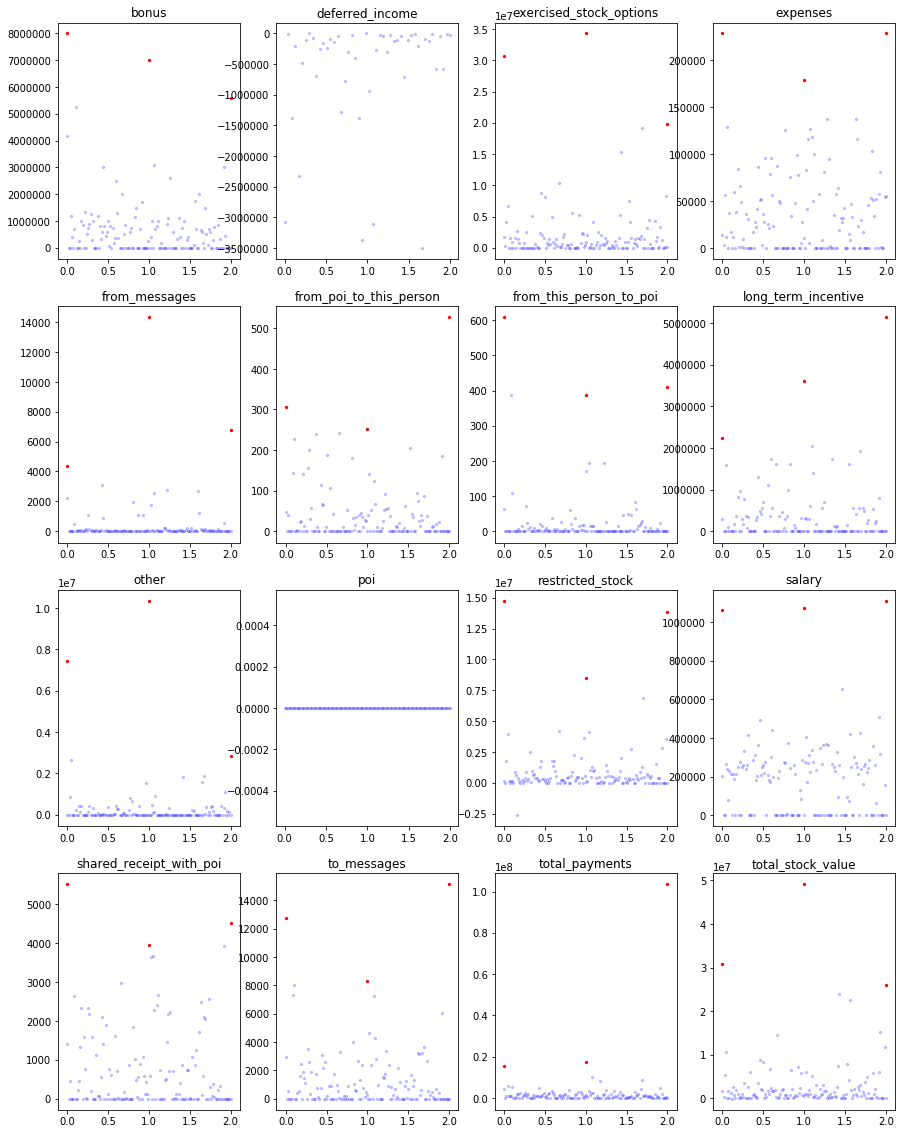

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(4, 4, figsize = (15, 20))

outliers = []
for i in xrange(4):
    for j in xrange(4):
    
        values = fp_df[features[i*4+j]].values
        upper = np.percentile(values, 98)
        
        y = values[values > upper]
        x = np.linspace(0, 2, len(y))

        ax[i, j].scatter(x, y, s = 5, c = 'red')
        #x = np.linspace(0, 2, len(fp_df[features[i*4+j]]))
        #ax[i, j].scatter(x, fp_df[features[i*4+j]], s = 3)
        
        y = values[values < upper]
        x = np.linspace(0, 2, len(y))
        ax[i, j].scatter(x, y, s = 5, c = 'blue', alpha = 0.2)
        ax[i, j].set_title(features[i*4+j])
        
        for o in np.where(values > upper)[0]:
            outliers.append(o)
        #outliers.append(list(np.where(values > upper)))
        
outliers = list(set(outliers))
#outliers

After removing 22 outliers, 123 samples remained.

In [14]:
print "BEFORE: {0}, AFTER: {1}".format(len(fp_df), len(fp_df.drop(fp_df.index[outliers], inplace=False)))

fp_df = fp_df.drop(fp_df.index[outliers], inplace=False)

BEFORE: 145, AFTER: 123


##### Rescaling

Scaling to have range from 0 to 1, expect email_address variable

# Feature Selection

In [15]:
y = fp_df['poi'].values
y = y.astype(np.bool)

x = fp_df.drop('poi', axis=1)

# Select Useful Features
'''x = fp_df[['exercised_stock_options', 'total_stock_value', 'bonus', 'salary',
          'deferred_income', 'long_term_incentive', 'restricted_stock', 'total_payments',
          'shared_receipt_with_poi']]'''

#x = fp_df[['restricted_stock', 'total_payments']]

"x = fp_df[['exercised_stock_options', 'total_stock_value', 'bonus', 'salary',\n          'deferred_income', 'long_term_incentive', 'restricted_stock', 'total_payments',\n          'shared_receipt_with_poi']]"

In [16]:
from sklearn.feature_selection import SelectKBest

k_best = SelectKBest()
#k_best.fit(scaled_x, y)
k_best.fit(x, y)
#zip(x.keys(), k_best.scores_)
scores = sorted(zip(x.keys(), k_best.scores_), key=lambda x: x[1], reverse=True)

for i in scores:
    print "{0}\t: {1}".format(i[0], i[1])

# Select Features with scores over 5
selected_features = []
for name, score in scores:
    if score > 5:
        selected_features.append(name)

selected_features

from_poi_to_this_person	: 11.0873594007
expenses	: 10.6516930525
salary	: 10.2723075974
restricted_stock	: 8.10682920304
long_term_incentive	: 7.51704664436
bonus	: 6.28070265641
shared_receipt_with_poi	: 6.02782232515
deferred_income	: 5.40181175615
total_payments	: 3.11196705247
other	: 2.24650619753
to_messages	: 2.10603669254
total_stock_value	: 2.09515396301
from_this_person_to_poi	: 0.772465361681
from_messages	: 0.506942391019
exercised_stock_options	: 0.345875458361


['from_poi_to_this_person',
 'expenses',
 'salary',
 'restricted_stock',
 'long_term_incentive',
 'bonus',
 'shared_receipt_with_poi',
 'deferred_income']

In [17]:
fp_df[selected_features]

,from_poi_to_this_person,expenses,salary,restricted_stock,long_term_incentive,bonus,shared_receipt_with_poi,deferred_income
ALLEN PHILLIP K,47,13868,201955,126027,304805,4.175e+06,1407,-3.08106e+06
BADUM JAMES P,0,3486,0,0,0,0,0,0
BANNANTINE JAMES M,39,56301,477,1.75755e+06,0,0,465,-5104
BAXTER JOHN C,0,11200,267102,3.94271e+06,1.58606e+06,1.2e+06,0,-1.38606e+06
BAY FRANKLIN R,0,129142,239671,145796,0,400000,0,-201641
BAZELIDES PHILIP J,0,0,80818,0,93750,0,0,0
BELFER ROBERT,0,0,0,0,0,0,0,0
BERBERIAN DAVID,0,11892,216582,869220,0,0,0,0
BERGSIEKER RICHARD P,4,59175,187922,659249,180250,250000,233,-485813
BIBI PHILIPPE A,23,38559,213625,378082,369721,1e+06,1336,0


# Rescaling

Scaling to have range from 0 to 1, expect email_address variable

In [29]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

sclr = MinMaxScaler(feature_range=(0, 1))

scaled_x = sclr.fit_transform(x)

scaled_x

array([[ 1.        ,  0.01153541,  0.19582858, ...,  0.48213989,
         0.79591214,  0.1486844 ],
       [ 0.        ,  1.        ,  0.02919152, ...,  0.        ,
         0.03238461,  0.02530923],
       [ 0.        ,  0.99836253,  0.45812917, ...,  0.09403555,
         0.16260938,  0.44325979],
       ..., 
       [ 0.        ,  1.        ,  0.0157531 , ...,  0.        ,
         0.        ,  0.01535965],
       [ 0.        ,  1.        ,  0.94074206, ...,  0.        ,
         0.06394712,  1.        ],
       [ 0.        ,  1.        ,  0.02182517, ...,  0.        ,
         0.00977878,  0.01985531]])

# Train and Test Set

In [56]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = \
    train_test_split(scaled_x, y, test_size=0.1, random_state=33)
    
print 'X: {0}, Y: {1}'.format(np.shape(features_train), np.shape(features_test))

X: (110, 15), Y: (13, 15)


# Biased Data

In [57]:
from sklearn.svm import SVC
clf = SVC(kernel = 'rbf', C = 1000, gamma = 0.01)
clf.fit(features_train, labels_train)
print 'PRED: {0} \nTRUE: {1}'.format(clf.predict(features_test), labels_test)

clf.score(features_test, labels_test)

PRED: [False False False False False False False False False False False False
 False] 
TRUE: [False False False False False False False False False False False False
 False]


1.0

# Bias Balancing

In [58]:
random_non_poi = list(np.random.randint(len(y[y == False]), size=len(y[y == True])*2))
poi = list(np.where(y == True)[0])
#idx = random_non_poi.append(poi)
idx = random_non_poi + poi

In [59]:
sx = scaled_x[idx]
sy = y[idx]

In [60]:
np.sum(sy)/float(len(sy))

0.3611111111111111

# SVM

In [61]:
from sklearn.svm import SVC
clf = SVC(kernel = 'rbf', C = 1000, gamma = 0.01)
clf.fit(sx, sy)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [62]:
pred = clf.predict(features_test)
pred

array([False, False, False,  True,  True, False, False, False, False,
       False, False, False, False], dtype=bool)

In [63]:
labels_test

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False], dtype=bool)

In [64]:
clf.score(features_test, labels_test)

0.84615384615384615

In [65]:
clf.support_

array([ 0,  1, 21, 23, 27, 29, 30, 32, 33, 34, 35], dtype=int32)

# PCA

In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(x)
X_train_pca = pca.transform(sx)

In [67]:
np.shape(X_train_pca)

(36, 2)

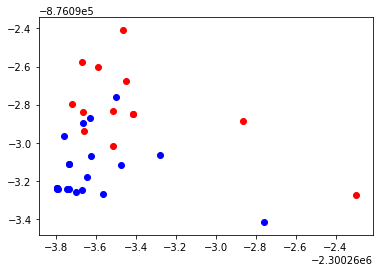

In [68]:
np.where(sy == True)
plt.scatter(X_train_pca[np.where(sy == True), 0], X_train_pca[np.where(sy == True), 1], c = 'red')
plt.scatter(X_train_pca[np.where(sy == False), 0], X_train_pca[np.where(sy == False), 1], c = 'blue')

# References

http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html